## Updated Crude Oil Prices Since 2014 to Feb 1st 2024. 

#### By: Johnathan Williams
#### Inspired by Medium article: Dimitrios Koulialias

# Bring in the Imports

In [1]:
import pandas as pd
import numpy as np
import yfinance as yfin
import plotly.offline as plo
import plotly.graph_objs as go

/opt/anaconda3/lib/python3.9/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Get the Oil Price Data from Yahoo Finance


### In order for me to get access to Yahoo Finance API I had to 
#### ~ pip install yfinance~

In [2]:
ticker = 'CL=F'

ticker = yfin.Ticker(ticker)

df = ticker.history(period='10y')

## Drop null and missing values

In [4]:
df.isnull().values.any()

False

## Show First Ten Rows of Data

In [19]:
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Closing_50d_rolling_mean,Closing_200d_rolling_mean
Date,,,,,,,,,
2014-02-03 00:00:00-05:00,97.400002,97.940002,96.260002,96.430000,293312,0.0,0.0,NaN,NaN
2014-02-04 00:00:00-05:00,96.529999,97.820000,96.370003,97.190002,204282,0.0,0.0,NaN,NaN
2014-02-05 00:00:00-05:00,97.669998,98.260002,96.800003,97.379997,237671,0.0,0.0,NaN,NaN
2014-02-06 00:00:00-05:00,97.250000,98.830002,97.250000,97.839996,234281,0.0,0.0,NaN,NaN
2014-02-07 00:00:00-05:00,97.970001,100.239998,97.110001,99.879997,270407,0.0,0.0,NaN,NaN
2014-02-10 00:00:00-05:00,100.050003,100.550003,99.110001,100.059998,251127,0.0,0.0,NaN,NaN
2014-02-11 00:00:00-05:00,99.970001,100.599998,99.599998,99.940002,233933,0.0,0.0,NaN,NaN
2014-02-12 00:00:00-05:00,100.459999,101.379997,100.040001,100.370003,318686,0.0,0.0,NaN,NaN
2014-02-13 00:00:00-05:00,100.269997,100.660004,99.400002,100.349998,221722,0.0,0.0,NaN,NaN


## Graph Oil Prices from 2014 to Date of Today

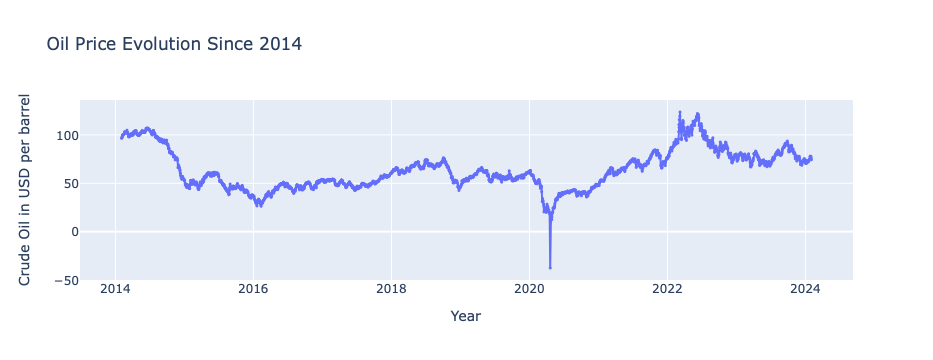

In [15]:
traces = [go.Scatter(x=df.index,
                    y=df['Close'],
                    mode='markers+lines',
                    marker_size=3)]
layout = go.Layout(title='Oil Price Evolution Since 2014', xaxis=dict(title="Year"),
                   yaxis=dict(title="Crude Oil in USD per barrel"))
fig = go.Figure(data=traces, layout=layout)

fig.show()


## Show Moving Averages of Crude Oil Since 2014

In [16]:
df['Closing_50d_rolling_mean'] = df['Close'].rolling(50).mean()
df['Closing_200d_rolling_mean'] = df['Close'].rolling(200).mean()

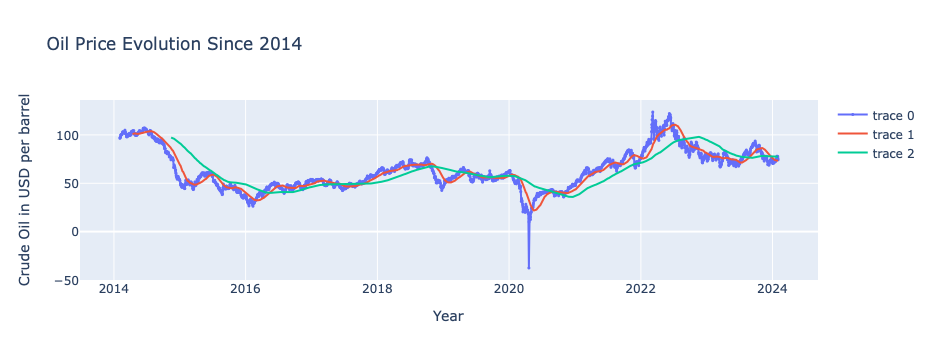

In [17]:
fig.add_scatter(x=df.index, y=df['Closing_50d_rolling_mean'], mode='lines')
fig.add_scatter(x=df.index, y=df['Closing_200d_rolling_mean'], mode='lines')